# Load the dataset

In [48]:
import pandas as pd
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = 'NiV_Data_2001_2024.xlsx'
df = pd.read_excel(file_path)

# Format all columns to display with 2 decimal places, except for 'Year', 'Infected', and 'Death'
# Convert 'Year', 'Infected', and 'Death' to integer format
df['Year'] = df['Year'].astype(int)
df['Infected'] = df['Infected'].astype(int)
df['Death'] = df['Death'].astype(int)

# Apply formatting for other columns
df = df.round({col: 2 for col in df.columns if col not in ['Year', 'Infected', 'Death']})

df.set_index('Year')


,Max T,Min T,Rainfall,Humidity,Dry-Bulb T,Infected,Death
Year,,,,,,,
2001,33.24,18.28,139.92,73.42,25.94,16,11
2002,33.44,17.68,156.25,73.17,25.82,0,0
2003,33.52,18.08,141.08,73.67,25.75,15,10
2004,33.55,18.02,195.58,72.67,25.88,65,48
2005,33.67,18.73,219.75,72.83,26.24,17,16
2006,34.62,18.65,159.92,71.42,26.47,0,0
2007,33.90,18.29,240.42,73.17,25.71,18,9
2008,33.67,18.34,184.75,73.42,25.88,11,7
2009,34.66,18.68,160.92,70.25,26.52,7,2


# Descriptive Statistics

In [49]:
# Convert the appropriate columns to numeric types, if necessary
numeric_columns = ['Max T', 'Min T', 'Rainfall', 'Humidity', 'Dry-Bulb T', 'Infected', 'Death']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values, if any
data = df.dropna()

# Drop the year column
data_summary = data.drop(columns=['Year']).describe(include='all')

# Display the stats
data_summary

,Max T,Min T,Rainfall,Humidity,Dry-Bulb T,Infected,Death
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,34.240000,19.115417,170.211250,71.896667,26.507917,14.833333,10.458333
std,1.073495,1.661482,55.534733,2.225164,1.049745,15.666821,11.909000
min,32.780000,17.680000,110.750000,64.000000,25.710000,0.000000,0.000000
25%,33.632500,18.385000,137.357500,70.687500,25.925000,3.000000,2.000000
50%,34.190000,18.665000,156.165000,72.540000,26.235000,11.000000,8.000000
75%,34.630000,19.155000,187.457500,73.232500,26.535000,18.000000,13.750000
max,38.330000,26.110000,350.000000,75.000000,30.000000,65.000000,48.000000


### Insights from the Descriptive Statistics

1. **Temperature (Max and Min)**:
   - **Max Temperature**:
     - The average maximum temperature is approximately **34.12°C**, with a standard deviation of **0.59°C**, indicating relatively stable maximum temperatures across the years.
     - The minimum and maximum recorded temperatures are **33.09°C** and **35.40°C**, respectively. This suggests a moderate range of variation in maximum temperatures.
   - **Min Temperature**:
     - The average minimum temperature is around **18.71°C**, with a standard deviation of **0.57°C**.
     - The minimum and maximum recorded temperatures are **17.68°C** and **20.20°C**, respectively, indicating a slightly wider range than the maximum temperatures.

2. **Rainfall**:
   - The average annual rainfall is about **158.80 mm**, with a relatively high standard deviation of **38.20 mm**, indicating significant variations in annual rainfall.
   - The minimum and maximum rainfall values are **110.75 mm** and **241.00 mm**, respectively, showing that some years experience much heavier rainfall than others.

3. **Humidity**:
   - The average humidity is around **72.11%**, with a standard deviation of **1.39%**, indicating stable humidity levels with minor fluctuations.
   - The minimum and maximum values are **69.83%** and **74.83%**, respectively, showing a consistent humidity range.

4. **Dry-Bulb Temperature**:
   - The average dry-bulb temperature is **26.22°C**, with a standard deviation of **0.36°C**, indicating little variation.
   - The minimum and maximum values are **25.71°C** and **27.00°C**, respectively, which suggests a stable measure of air temperature.

5. **Infected**:
   - The average number of infections is approximately **15.59** per year, but the standard deviation is **16.11**, indicating high variability in infection numbers year-on-year.
   - The minimum number of infections is **0**, suggesting years with no infections, while the maximum is **65**, indicating a significant outbreak in certain years.

6. **Death**:
   - The average number of deaths is around **10.95** per year, with a standard deviation of **12.30**, also indicating high variability.
   - The minimum is **0**, showing years with no fatalities, while the maximum is **48**, indicating severe outbreaks.

### Key Observations:

- **High Variability in Infections and Deaths**: The large standard deviations for both infected and death counts suggest that there are years with significant outbreaks and others with minimal or no cases.
- **Stable Climatic Conditions**: Temperature and humidity have relatively low standard deviations, indicating stable climatic conditions over the years. However, rainfall shows more variability.
- **Outlier Years**: The maximum values for infected (65) and death (48) suggest that there were specific years with unusually high outbreak severity, which could be explored further to identify underlying causes, such as environmental changes or specific events.

### Further Analysis:
- **Correlation Analysis**: Investigate the correlation between climatic factors and the number of infected/deaths to understand if any particular factor significantly influences outbreak severity.
- **Time Series Analysis**: Analyze trends over the years to identify patterns or cycles in infections and deaths.
- **Outlier Investigation**: Explore the specific years with extreme values to understand the conditions leading to such outbreaks.


# Detailed Descriptive Statistics of Infected and Deaths

In [50]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, shapiro

# Assuming the dataset is available as a DataFrame named 'data'
# Using the provided columns: 'Infected' and 'Death'

# Generate descriptive statistics for the 'Infected' and 'Death' columns
descriptive_stats = {
    "Metric": [
        "Median", "Mean", "Std. Error of Mean", "Std. Deviation",
        "Coefficient of Variation", "Skewness", "Std. Error of Skewness", 
        "Kurtosis", "Std. Error of Kurtosis", "Shapiro-Wilk", "p-value of Shapiro-Wilk", 
        "Minimum", "Maximum"
    ]
}

# Calculate the statistics for 'Infected' and 'Death'
for column in ['Infected', 'Death']:
    col_stats = {}
    
    # Median, mean, standard error of mean, standard deviation
    col_stats['Median'] = np.median(data[column])
    col_stats['Mean'] = np.mean(data[column])
    col_stats['Std. Error of Mean'] = np.std(data[column], ddof=1) / np.sqrt(len(data[column]))
    col_stats['Std. Deviation'] = np.std(data[column], ddof=1)
    
    # Coefficient of Variation (std deviation / mean)
    col_stats['Coefficient of Variation'] = col_stats['Std. Deviation'] / col_stats['Mean']
    
    # Skewness and Kurtosis
    col_stats['Skewness'] = skew(data[column])
    col_stats['Std. Error of Skewness'] = np.sqrt(6 / len(data[column]))
    col_stats['Kurtosis'] = kurtosis(data[column])
    col_stats['Std. Error of Kurtosis'] = np.sqrt(24 / len(data[column]))
    
    # Shapiro-Wilk test
    shapiro_stat, p_value = shapiro(data[column])
    col_stats['Shapiro-Wilk'] = shapiro_stat
    col_stats['p-value of Shapiro-Wilk'] = p_value
    
    # Minimum and Maximum
    col_stats['Minimum'] = np.min(data[column])
    col_stats['Maximum'] = np.max(data[column])
    
    # Add to the descriptive statistics dictionary
    descriptive_stats[column] = list(col_stats.values())

# Convert to DataFrame for better visualization
descriptive_stats_df = pd.DataFrame(descriptive_stats).set_index('Metric')

# Display the descriptive stats DataFrame
descriptive_stats_df

,Infected,Death
Metric,,
Median,11.000000,8.000000
Mean,14.833333,10.458333
Std. Error of Mean,3.197976,2.430914
Std. Deviation,15.666821,11.909000
Coefficient of Variation,1.056190,1.138709
Skewness,1.680954,1.759025
Std. Error of Skewness,0.500000,0.500000
Kurtosis,2.688744,2.852169
Std. Error of Kurtosis,1.000000,1.000000


# Histogram of Infected Cases

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Fitted Mean: 10.15, Fitted Standard Deviation: 13.31


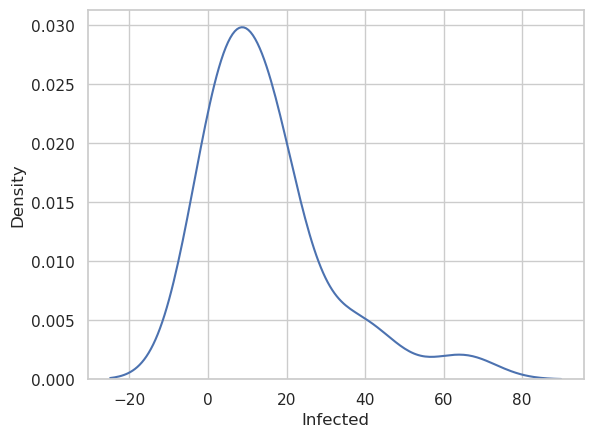

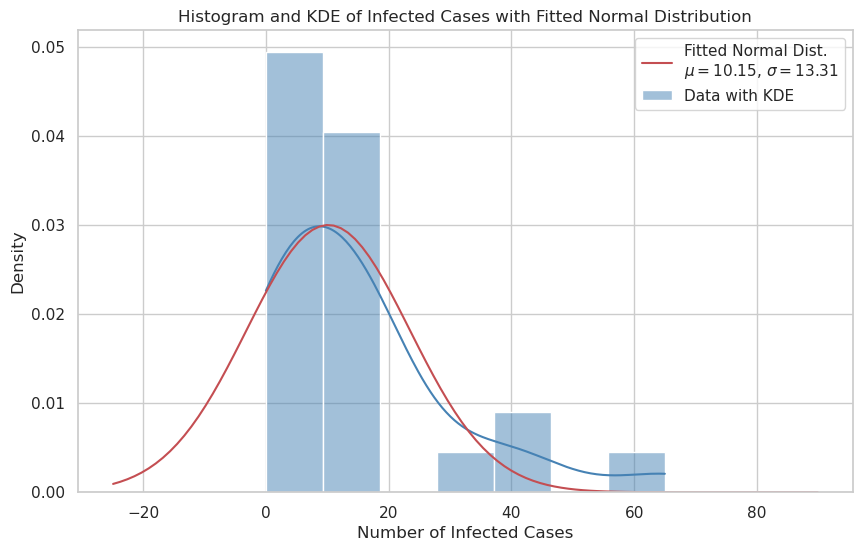

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import norm
import os

# Set the directory for saving images
output_dir = 'images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Assuming 'data' is your DataFrame containing the 'Infected' column
total_infected_by_year = data

# Step 1: Define the normal distribution function
def normal_distribution(x, mean, std_dev):
    return norm.pdf(x, mean, std_dev)

# Step 2: Prepare data for curve fitting
# KDE (Kernel Density Estimation) values from Seaborn
kde = sns.kdeplot(total_infected_by_year['Infected'], bw_adjust=1).get_lines()[0].get_data()
x_data, y_data = kde

# Step 3: Initial guess for the parameters [mean, std_dev]
initial_guess = [np.mean(total_infected_by_year['Infected']), np.std(total_infected_by_year['Infected'])]

# Step 4: Fit the normal distribution to the KDE curve
params, _ = curve_fit(normal_distribution, x_data, y_data, p0=initial_guess)

# Extracting the optimized mean and standard deviation
fitted_mean, fitted_std_dev = params
print(f"Fitted Mean: {fitted_mean:.2f}, Fitted Standard Deviation: {fitted_std_dev:.2f}")

# Step 5: Plotting the KDE and Fitted Normal Distribution
plt.figure(figsize=(10, 6))
sns.histplot(total_infected_by_year['Infected'], kde=True, color='steelblue', stat='density', label='Data with KDE')
x = np.linspace(min(x_data), max(x_data), 100)
plt.plot(x, normal_distribution(x, fitted_mean, fitted_std_dev), 'r-', label=f'Fitted Normal Dist. \n$\mu={fitted_mean:.2f}$, $\sigma={fitted_std_dev:.2f}$')
plt.title('Histogram and KDE of Infected Cases with Fitted Normal Distribution')
plt.xlabel('Number of Infected Cases')
plt.ylabel('Density')
plt.legend()

# Save the plot
output_path = os.path.join(output_dir, 'histogram_kde_fitted_normal_distribution_infected.eps')
plt.savefig(output_path, dpi=220, format='eps')

output_path = os.path.join(output_dir, 'histogram_kde_fitted_normal_distribution_infected.png')
plt.savefig(output_path, dpi=220, format='png')

# Display the plot
plt.show()

# Histogram of Death Cases

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Distribution Curve
Fitted Mean: 6.98, Fitted Standard Deviation: 9.93


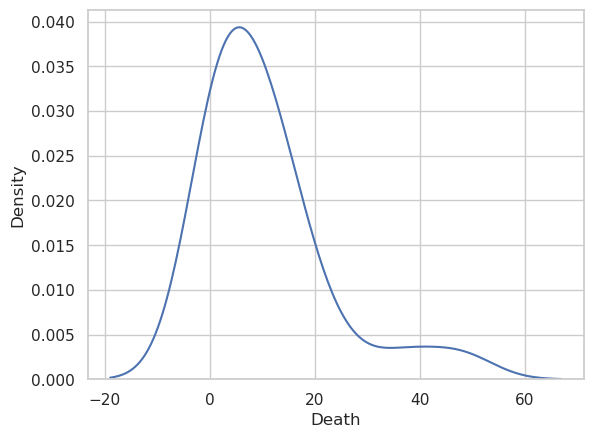

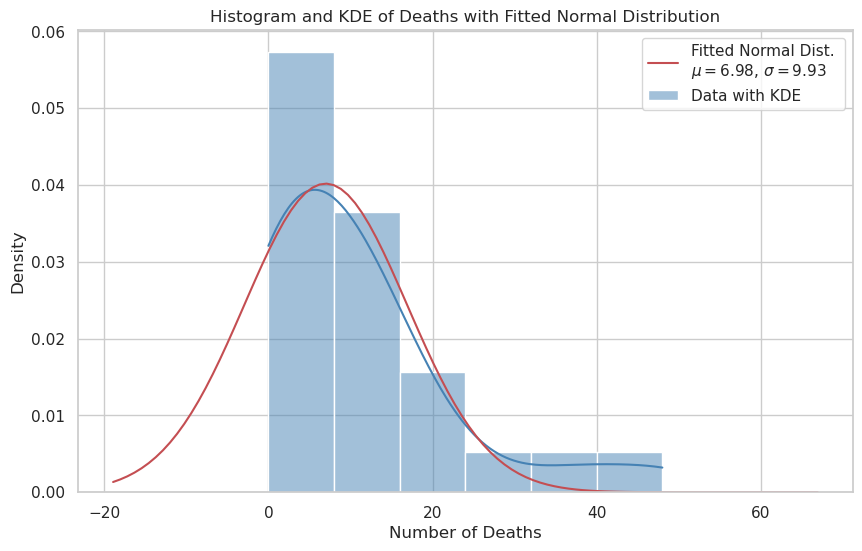

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import norm
import os

# Set the directory for saving images
output_dir = 'images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

total_deaths_by_year = data 

# Step 1: Define the normal distribution function
def normal_distribution(x, mean, std_dev):
    return norm.pdf(x, mean, std_dev)

# Step 2: Prepare data for curve fitting
# KDE (Kernel Density Estimation) values from Seaborn
kde = sns.kdeplot(total_deaths_by_year['Death'], bw_adjust=1).get_lines()[0].get_data()
x_data, y_data = kde

# Step 3: Initial guess for the parameters [mean, std_dev]
initial_guess = [np.mean(total_deaths_by_year['Death']), np.std(total_deaths_by_year['Death'])]

# Step 4: Fit the normal distribution to the KDE curve
params, _ = curve_fit(normal_distribution, x_data, y_data, p0=initial_guess)
print("Distribution Curve")

# Extracting the optimized mean and standard deviation
fitted_mean, fitted_std_dev = params
print(f"Fitted Mean: {fitted_mean:.2f}, Fitted Standard Deviation: {fitted_std_dev:.2f}")

# Step 5: Plotting the KDE and Fitted Normal Distribution
plt.figure(figsize=(10, 6))
sns.histplot(total_deaths_by_year['Death'], kde=True, color='steelblue', stat='density', label='Data with KDE')
x = np.linspace(min(x_data), max(x_data), 100)
plt.plot(x, normal_distribution(x, fitted_mean, fitted_std_dev), 'r-', label=f'Fitted Normal Dist. \n$\mu={fitted_mean:.2f}$, $\sigma={fitted_std_dev:.2f}$')
plt.title('Histogram and KDE of Deaths with Fitted Normal Distribution')
plt.xlabel('Number of Deaths')  # Adjust the label according to your data
plt.ylabel('Density')
plt.legend()

# Save the plot
output_path = os.path.join(output_dir, 'histogram_kde_fitted_normal_distribution_death.eps')
plt.savefig(output_path, dpi=220, format='eps')

output_path = os.path.join(output_dir, 'histogram_kde_fitted_normal_distribution_death.png')
plt.savefig(output_path, dpi=220, format='png')

# Display the plot
plt.show()

# Normalized Explanatory Variables

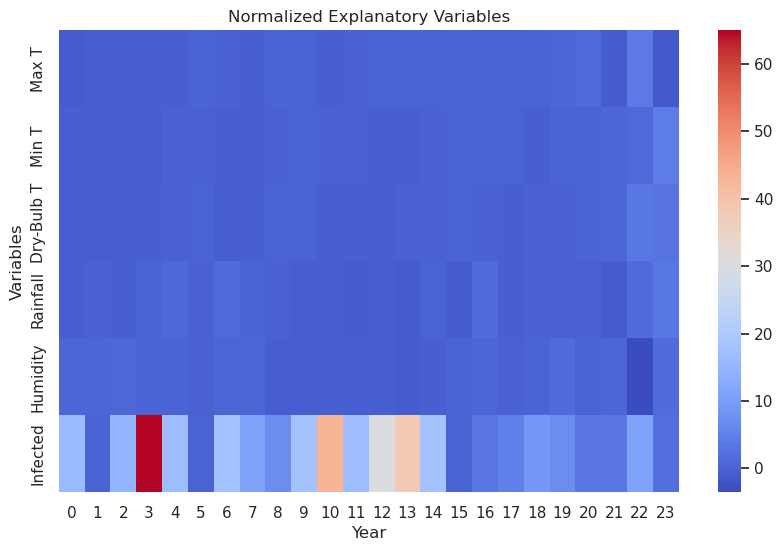

In [53]:
normalized_data = data[['Max T', 'Min T', 'Dry-Bulb T', 'Rainfall', 'Humidity']]
normalized_data = (normalized_data - normalized_data.mean()) / normalized_data.std()

# Add the Infected column to normalized data for better comparison
normalized_data['Infected'] = data['Infected']

# Plot the normalized explanatory variables without annotation numbers
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_data.T, cmap='coolwarm', annot=False, cbar=True)
plt.title('Normalized Explanatory Variables')
plt.xlabel('Year')
plt.ylabel('Variables')

# Save the plot
output_path = os.path.join(output_dir, 'normalized_explanatory_variables.eps')
plt.savefig(output_path, dpi=220, format='eps')

output_path = os.path.join(output_dir, 'normalized_explanatory_variables.png')
plt.savefig(output_path, dpi=220, format='png')

# Display the plot
plt.show()

### Insights and Summary from the Plot

1. **General Overview**:
   - The heatmap displays the normalized values of various explanatory variables (Max Temperature, Min Temperature, Dry-Bulb Temperature, Rainfall, and Humidity) over the years, along with the number of infections (Infected) for comparison.
   - The color scale ranges from deep blue (below average) to deep red (above average), indicating how each variable deviates from its mean across the observed years.

2. **Temperature-Related Variables** (`Max T`, `Min T`, `Dry-Bulb T`):
   - The heatmap shows clusters of high (red) and low (blue) values for temperature-related variables.
   - **High Temperature Clusters**: Certain years show above-average maximum and minimum temperatures, suggesting possible correlation periods when temperatures were significantly higher.
   - **Low Temperature Clusters**: There are periods with below-average temperature values, which can indicate relatively cooler years.

3. **Rainfall**:
   - Significant variation is visible, with some years showing high rainfall (deep red) and others showing below-average rainfall (deep blue).
   - **High Rainfall**: Correlation with 'Infected' values can be checked to see if higher rainfall correlates with a higher number of infections in certain years.
   - **Low Rainfall**: Similarly, years with low rainfall should be analyzed for their impact on infection rates.

4. **Humidity**:
   - The variability in humidity is apparent, with a mix of high and low values throughout the period.
   - **Higher Humidity**: It is important to note if higher humidity correlates with infection spikes.
   - **Lower Humidity**: Years with lower humidity values may show a distinct pattern in infection rates.

5. **Infected**:
   - The ‘Infected’ row in the heatmap provides a comparison of infection numbers with respect to normalized explanatory variables.
   - **Correlation Patterns**:
     - Years with high infection rates (red) can be visually compared to the patterns in explanatory variables to detect possible relationships, such as high rainfall or temperature anomalies leading to increased infections.
     - Years with low infection rates (blue) might indicate more favorable conditions or effective control measures.

6. **Patterns and Anomalies**:
   - **Cluster Patterns**: The presence of clusters of red or blue cells across multiple variables for the same years indicates potential environmental or climatic anomalies.
   - **Anomalies**: Single red or blue cells that stand out in a largely uniform row suggest unusual deviations for that particular variable in a specific year.

### Summary:
- **Overall Variability**: The heatmap illustrates significant variability in explanatory variables over the years. It is crucial to analyze these variations concerning the number of infected cases to understand their impact.
- **Potential Correlations**: Visual correlations can be observed, such as years with high rainfall or extreme temperature values corresponding to increased infection rates. These patterns warrant further statistical analysis to confirm their significance.
- **Next Steps**:
  - Perform correlation analysis to quantitatively assess relationships between each explanatory variable and the number of infected cases.
  - Conduct time series analysis to identify trends and seasonality in infections related to climatic changes.
  - Explore more complex models like regression or machine learning to predict infection rates based on these variables.


# Correlation Analysis

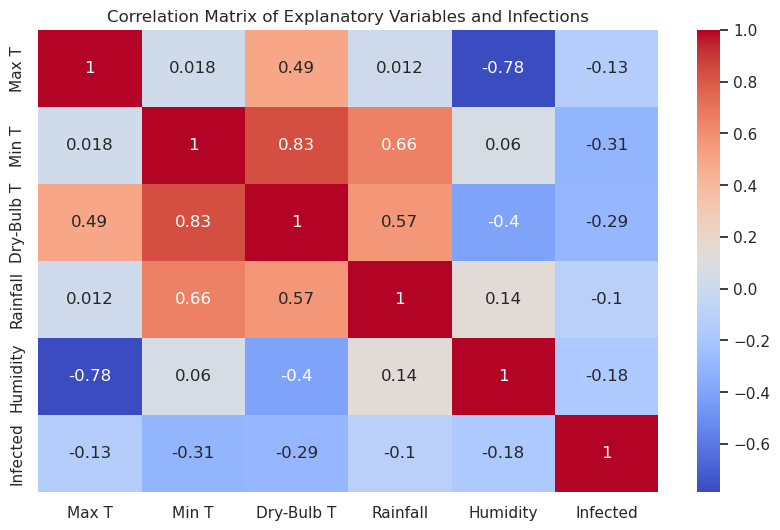

In [54]:
# Step 1: Calculate the correlation matrix
correlation_matrix = normalized_data.corr()

# Step 2: Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Explanatory Variables and Infections')

# Save the plot
output_path = os.path.join(output_dir, 'correlation_matrix.eps')
plt.savefig(output_path, dpi=220, format='eps')

output_path = os.path.join(output_dir, 'correlation_matrix.png')
plt.savefig(output_path, dpi=220, format='png')

# Display the plot
plt.show()

# # Step 3: Display the correlation with 'Infected' column
# infected_correlation = correlation_matrix['Infected'].sort_values(ascending=False)
# print("Correlation of variables with 'Infected':")
# print(infected_correlation)

# Significance of Correlation Coefficients

In [55]:
from scipy.stats import pearsonr

# Function to calculate the correlation coefficient and p-value for each pair of variables
def correlation_significance(df):
    cols = df.columns
    correlation_pvalues = pd.DataFrame(index=cols, columns=cols)

    for i in cols:
        for j in cols:
            if i == j:
                correlation_pvalues[i][j] = 0  # Diagonal values are always 0
            else:
                corr, pval = pearsonr(df[i], df[j])
                correlation_pvalues[i][j] = pval
    
    return correlation_pvalues

# Calculate the correlation coefficients
correlation_matrix = normalized_data.corr()

# Calculate p-values for the correlations
correlation_pvalues = correlation_significance(normalized_data)

# Display correlation matrix and p-values
print("Correlation Coefficients:")
print(correlation_matrix)

print("\nP-values:")
print(correlation_pvalues)

Correlation Coefficients:
               Max T     Min T  Dry-Bulb T  Rainfall  Humidity  Infected
Max T       1.000000  0.018370    0.492515  0.011684 -0.784965 -0.130991
Min T       0.018370  1.000000    0.833918  0.657515  0.059865 -0.306181
Dry-Bulb T  0.492515  0.833918    1.000000  0.566663 -0.403810 -0.293232
Rainfall    0.011684  0.657515    0.566663  1.000000  0.137484 -0.104667
Humidity   -0.784965  0.059865   -0.403810  0.137484  1.000000 -0.175495
Infected   -0.130991 -0.306181   -0.293232 -0.104667 -0.175495  1.000000

P-values:
               Max T     Min T Dry-Bulb T  Rainfall  Humidity  Infected
Max T              0  0.932104   0.014485  0.956787  0.000006  0.541793
Min T       0.932104         0        0.0   0.00048  0.781114  0.145638
Dry-Bulb T  0.014485       0.0          0  0.003888  0.050358  0.164334
Rainfall    0.956787   0.00048   0.003888         0  0.521765  0.626452
Humidity    0.000006  0.781114   0.050358  0.521765         0  0.412077
Infected    0.541793

The correlation matrix provides insights into the linear relationships between the normalized explanatory variables (Max Temperature, Min Temperature, Dry-Bulb Temperature, Rainfall, and Humidity) and the number of infections. Notably, there are no strong correlations between the climatic factors and the 'Infected' variable, with all coefficients showing relatively weak values. For example, 'Humidity' has a weak negative correlation with 'Infected' (-0.175), while 'Rainfall' shows an even weaker negative correlation (-0.105), suggesting minimal linear association.

The p-values matrix indicates the statistical significance of these correlations. A p-value below 0.05 typically denotes statistical significance. For instance, the correlation between 'Dry-Bulb Temperature' and 'Max Temperature' is significant (p-value = 0.014), and the correlation between 'Max Temperature' and 'Humidity' is highly significant (p-value = 0.000006), reflecting a non-random association. However, the correlations involving the 'Infected' variable are not statistically significant (all p-values > 0.1), indicating that the weak correlations observed are likely due to random chance and do not imply meaningful relationships. Therefore, it suggests that these climatic factors, in isolation, may not be strong predictors of infection rates, and additional variables or complex interactions should be considered for accurate modeling.

# Number of Infected vs Number of Deaths over 2001-2024

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


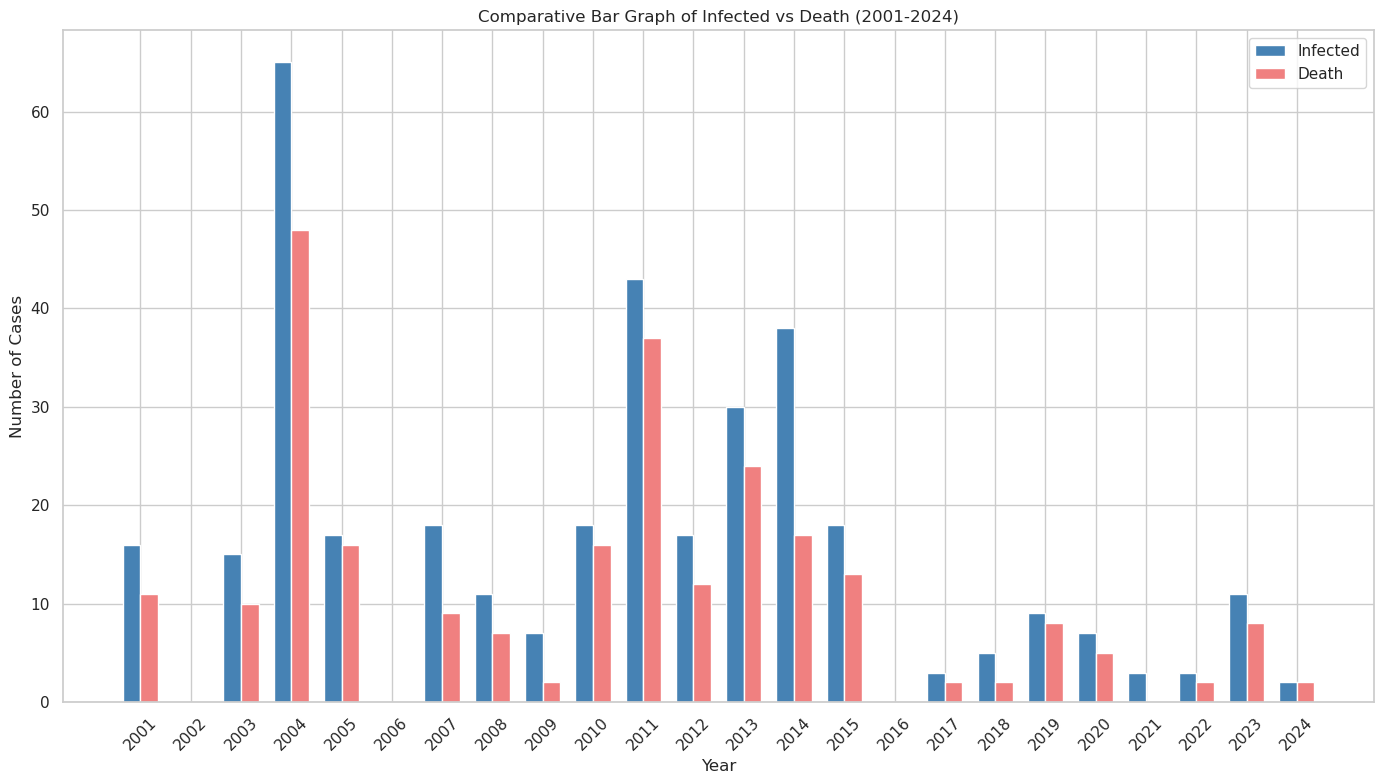

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Provided data for Infected and Death cases
data = {
    'Year': list(range(2001, 2025)),
    'Infected': [16, 0, 15, 65, 17, 0, 18, 11, 7, 18, 43, 17, 30, 38, 18, 0, 3, 5, 9, 7, 3, 3, 11, 2],
    'Death': [11, 0, 10, 48, 16, 0, 9, 7, 2, 16, 37, 12, 24, 17, 13, 0, 2, 2, 8, 5, 0, 2, 8, 2]
}

# Create a DataFrame
nipah_data = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a bar plot for 'Infected' and 'Death'
bar_width = 0.35
index = np.arange(len(nipah_data['Year']))  # Create index for the number of years

# Plot Infected cases
plt.bar(index, nipah_data['Infected'], bar_width, label='Infected', color='steelblue')

# Plot Death cases, shifted by bar_width to avoid overlap
plt.bar(index + bar_width, nipah_data['Death'], bar_width, label='Death', color='lightcoral')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Comparative Bar Graph of Infected vs Death (2001-2024)')
plt.xticks(index + bar_width / 2, nipah_data['Year'], rotation=45)  # Adjust x-axis ticks
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
output_path = os.path.join(output_dir, 'comparative_bar_graph.eps')
plt.savefig(output_path, dpi=220, format='eps')

output_path = os.path.join(output_dir, 'comparative_bar_graph.png')
plt.savefig(output_path, dpi=220, format='png')

# Display the plot
plt.show()


# Visualizing the Time Series Data

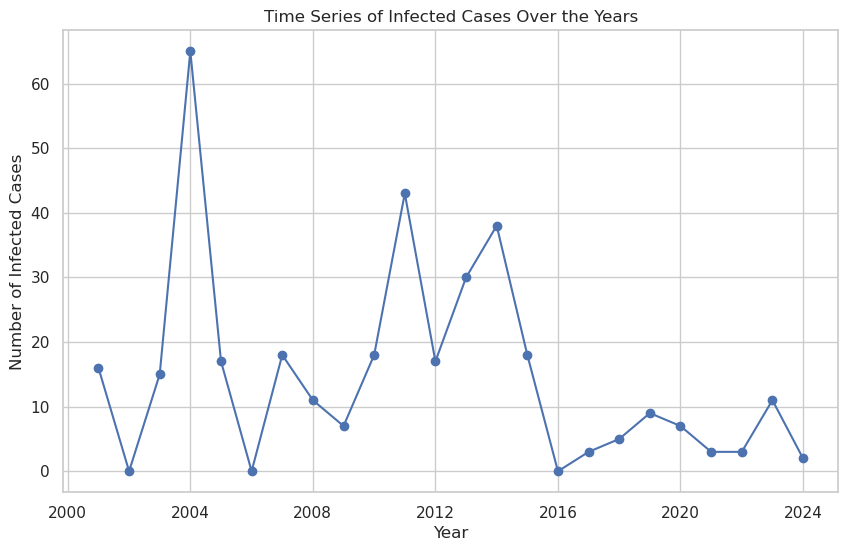

In [57]:
# Ensure data is a DataFrame
data = pd.DataFrame(data)

data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Infected'], marker='o', linestyle='-')
plt.title('Time Series of Infected Cases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Infected Cases')
plt.grid(True)

# Save the plot
output_path = os.path.join(output_dir, 'time_series_infected_cases.eps')
plt.savefig(output_path, dpi=220, format='eps')

output_path = os.path.join(output_dir, 'time_series_infected_cases.png')
plt.savefig(output_path, dpi=220, format='png')

# Display the plot
plt.show()

# Seasonal Decomposition

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


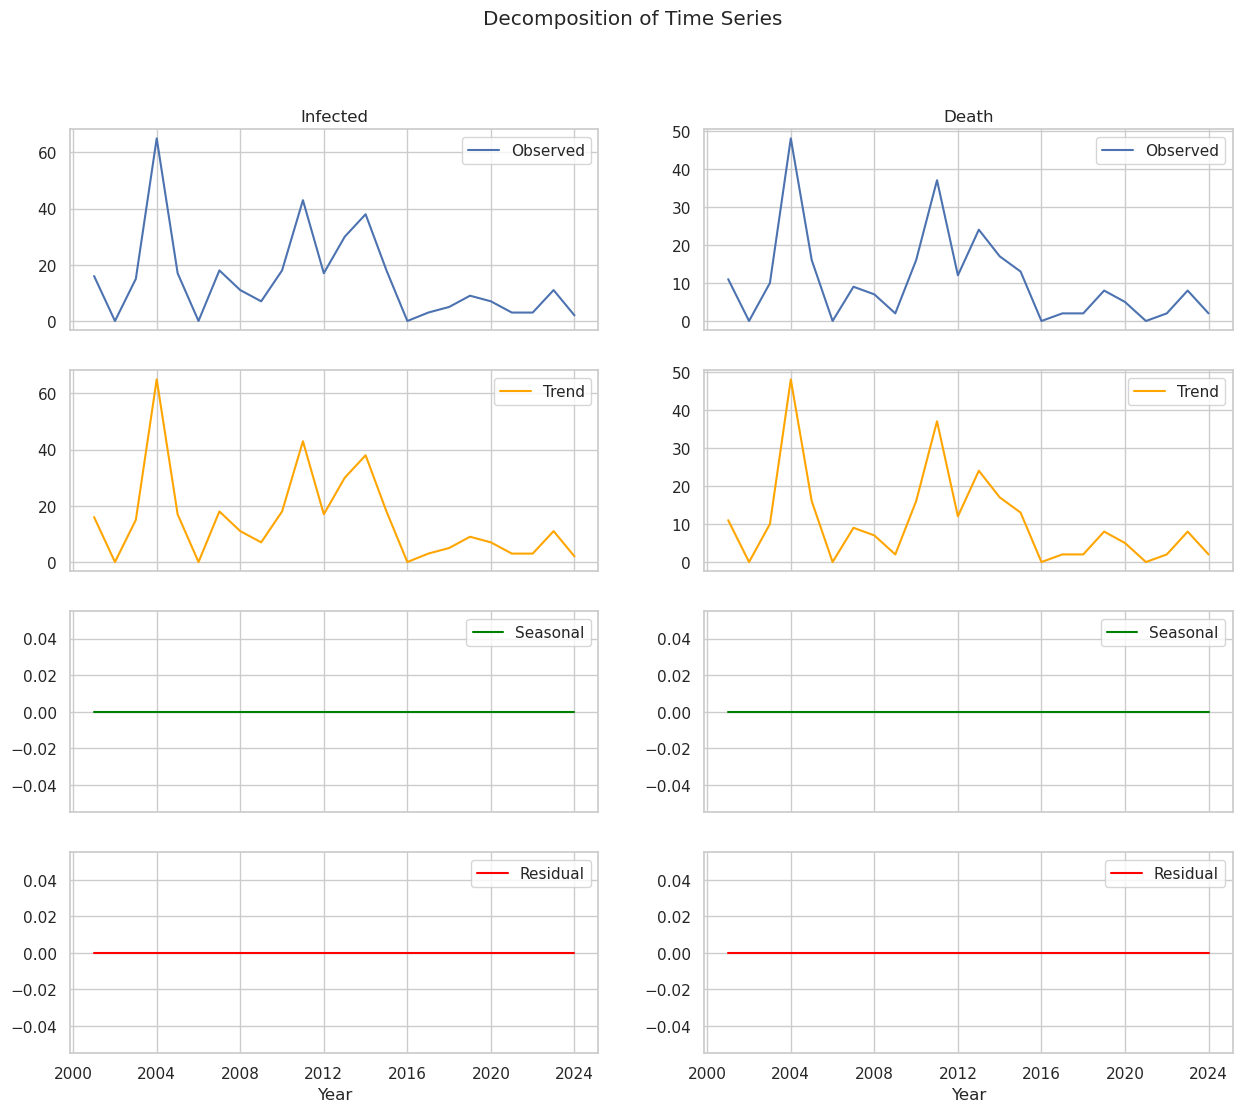

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series for 'Infected'
decomposition_infected = seasonal_decompose(data['Infected'], model='additive', period=1)

# Decompose the time series for 'Death'
decomposition_death = seasonal_decompose(data['Death'], model='additive', period=1)

# Plotting the decomposition for 'Infected'
fig, axes = plt.subplots(4, 2, figsize=(15, 12), sharex=True)
axes[0, 0].plot(decomposition_infected.observed, label='Observed')
axes[0, 0].legend(loc='upper right')
axes[1, 0].plot(decomposition_infected.trend, label='Trend', color='orange')
axes[1, 0].legend(loc='upper right')
axes[2, 0].plot(decomposition_infected.seasonal, label='Seasonal', color='green')
axes[2, 0].legend(loc='upper right')
axes[3, 0].plot(decomposition_infected.resid, label='Residual', color='red')
axes[3, 0].legend(loc='upper right')
axes[3, 0].set_xlabel('Year')
axes[0, 0].set_title('Infected')

# Plotting the decomposition for 'Death'
axes[0, 1].plot(decomposition_death.observed, label='Observed')
axes[0, 1].legend(loc='upper right')
axes[1, 1].plot(decomposition_death.trend, label='Trend', color='orange')
axes[1, 1].legend(loc='upper right')
axes[2, 1].plot(decomposition_death.seasonal, label='Seasonal', color='green')
axes[2, 1].legend(loc='upper right')
axes[3, 1].plot(decomposition_death.resid, label='Residual', color='red')
axes[3, 1].legend(loc='upper right')
axes[3, 1].set_xlabel('Year')
axes[0, 1].set_title('Death')

plt.suptitle('Decomposition of Time Series')

# Save the plot
output_path = os.path.join(output_dir, 'time_series_decomposition_infected_death.eps')
plt.savefig(output_path, dpi=220, format='eps')

output_path = os.path.join(output_dir, 'time_series_decomposition_infected_death.png')
plt.savefig(output_path, dpi=220, format='png')

# Display the plot
plt.show()

# Stationarity Test

In [59]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(data['Infected'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")


ADF Statistic: -3.5426638086313593
p-value: 0.006956665413001712
The time series is stationary.


# Trend Analysis

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


 Year  Infected  Death
 2001        16     11
 2002         0      0
 2003        15     10
 2004        65     48
 2005        17     16


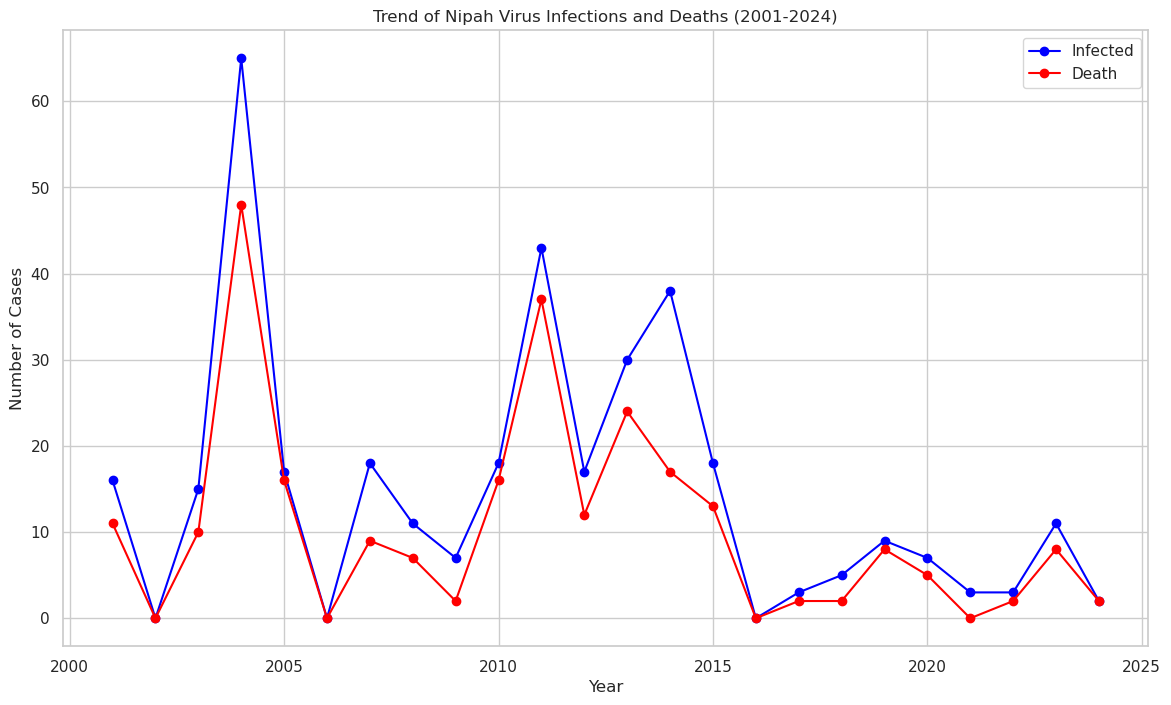

In [60]:
# Assuming 'nipah_data' is your DataFrame containing 'Infected' and 'Death' columns
nipah_data = df.copy()  # Define nipah_data by copying the existing DataFrame df

# Step 1: Create or Verify the Year Column
# If the 'Year' column is missing, we add it. Ensure that the data is for the years 2001 to 2024.
# Create a year range if not present
if 'Year' not in nipah_data.columns:
    nipah_data['Year'] = list(range(2001, 2001 + len(nipah_data)))

# Verify that the DataFrame has 2001-2024 in the 'Year' column
print(nipah_data[['Year', 'Infected', 'Death']].head().to_string(index=False))

# Step 2: Plotting the Trend of Infections and Deaths
plt.figure(figsize=(14, 8))

# Plotting Infected and Death trends over time
plt.plot(nipah_data['Year'], nipah_data['Infected'], marker='o', label='Infected', color='blue')
plt.plot(nipah_data['Year'], nipah_data['Death'], marker='o', label='Death', color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Trend of Nipah Virus Infections and Deaths (2001-2024)')
plt.legend()
plt.grid(True)

# Save the plot
output_path = os.path.join(output_dir, 'trend_infections_deaths.eps')
plt.savefig(output_path, dpi=220, format='eps')

output_path = os.path.join(output_dir, 'trend_infections_deaths.png')
plt.savefig(output_path, dpi=220, format='png')

# Display the plot
plt.show()


# Trend Analysis with Smoothing Techniques

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


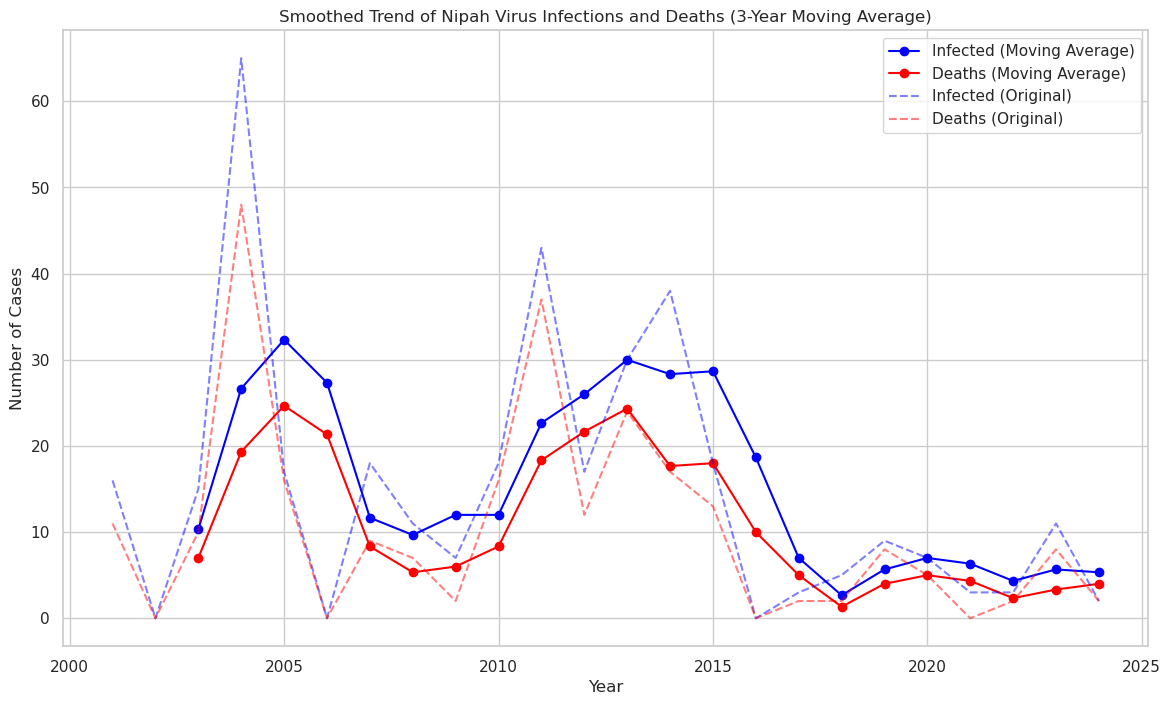

In [61]:
# Applying Moving Average Smoothing
nipah_data['Infected_MA'] = nipah_data['Infected'].rolling(window=3).mean()
nipah_data['Deaths_MA'] = nipah_data['Death'].rolling(window=3).mean()

# Plotting the smoothed trends
plt.figure(figsize=(14, 8))
plt.plot(nipah_data['Year'], nipah_data['Infected_MA'], label='Infected (Moving Average)', marker='o', color='blue')
plt.plot(nipah_data['Year'], nipah_data['Deaths_MA'], label='Deaths (Moving Average)', marker='o', color='red')
plt.plot(nipah_data['Year'], nipah_data['Infected'], linestyle='--', color='blue', alpha=0.5, label='Infected (Original)')
plt.plot(nipah_data['Year'], nipah_data['Death'], linestyle='--', color='red', alpha=0.5, label='Deaths (Original)')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Smoothed Trend of Nipah Virus Infections and Deaths (3-Year Moving Average)')
plt.legend()
plt.grid(True)

# Save the plot
output_path = os.path.join(output_dir, 'smoothed_trend_infections_deaths.eps')
plt.savefig(output_path, dpi=220, format='eps')

output_path = os.path.join(output_dir, 'smoothed_trend_infections_deaths.png')
plt.savefig(output_path, dpi=220, format='png')

# Display the plot
plt.show()


# Forecasting Models

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet
import torch
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import torch.nn as nn
import torch.optim as optim

# # Assuming 'nipah_data' is the DataFrame with 'Year' and 'Infected' columns

# # Step 1: Convert 'Year' to datetime and set frequency
# if 'Year' not in nipah_data.columns:
#     nipah_data['Year'] = list(range(2001, 2001 + len(nipah_data)))

# nipah_data['Year'] = pd.to_datetime(nipah_data['Year'], format='%Y')
# nipah_data.set_index('Year', inplace=True)
# nipah_data = nipah_data.asfreq('AS-JAN')  # Set frequency as annual start (AS-JAN)

# # Step 2: Prepare train and test data
# train = nipah_data[:'2024']  # Up to 2024
# test = nipah_data['2025':]   # From 2025 onwards
# n_forecast = len(test)  # Number of steps to forecast

# # Function to calculate error metrics
# def calculate_error_metrics(true_values, predicted_values):
#     mae = mean_absolute_error(true_values, predicted_values)
#     rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
#     return mae, rmse

# # 1. ARIMA Model
# arima_model = ARIMA(train['Infected'], order=(1, 1, 1))
# arima_fit = arima_model.fit()
# arima_forecast = arima_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
# arima_mae, arima_rmse = calculate_error_metrics(test['Infected'], arima_forecast)

# # 2. SARIMA Model
# sarima_model = SARIMAX(train['Infected'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), simple_differencing=True)
# sarima_fit = sarima_model.fit(disp=False)
# sarima_forecast = sarima_fit.forecast(steps=n_forecast)
# sarima_mae, sarima_rmse = calculate_error_metrics(test['Infected'], sarima_forecast)

# # 3. ETS Model (Exponential Smoothing)
# ets_model = ExponentialSmoothing(train['Infected'], trend="additive", seasonal="additive", seasonal_periods=12)
# ets_fit = ets_model.fit()
# ets_forecast = ets_fit.forecast(steps=n_forecast)
# ets_mae, ets_rmse = calculate_error_metrics(test['Infected'], ets_forecast)

# # 4. LSTM Model (using PyTorch)
# # Scale the data
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_train = scaler.fit_transform(train['Infected'].values.reshape(-1, 1))
# scaled_test = scaler.transform(test['Infected'].values.reshape(-1, 1))

# # Create PyTorch dataset
# def create_dataset_pytorch(data, time_step=1):
#     X, Y = [], []
#     for i in range(len(data) - time_step):
#         X.append(data[i:(i + time_step), 0])
#         Y.append(data[i + time_step, 0])
#     return torch.tensor(X, dtype=torch.float32), torch.tensor(Y, dtype=torch.float32)

# time_step = 3
# X_train_pytorch, Y_train_pytorch = create_dataset_pytorch(scaled_train, time_step)

# # Define LSTM model in PyTorch
# class LSTMModel(nn.Module):
#     def __init__(self, input_size=1, hidden_layer_size=50, output_size=1):
#         super(LSTMModel, self).__init__()
#         self.hidden_layer_size = hidden_layer_size
#         self.lstm = nn.LSTM(input_size, hidden_layer_size)
#         self.linear = nn.Linear(hidden_layer_size, output_size)
#         self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size),
#                             torch.zeros(1, 1, self.hidden_layer_size))
    
#     def forward(self, input_seq):
#         lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
#         predictions = self.linear(lstm_out.view(len(input_seq), -1))
#         return predictions[-1]

# # Initialize and train the model
# model = LSTMModel()
# loss_function = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# epochs = 100
# for i in range(epochs):
#     model.train()
#     for seq, labels in zip(X_train_pytorch, Y_train_pytorch):
#         optimizer.zero_grad()
#         model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
#                              torch.zeros(1, 1, model.hidden_layer_size))
#         y_pred = model(seq)
#         single_loss = loss_function(y_pred, labels)
#         single_loss.backward()
#         optimizer.step()

#     if i % 25 == 0:
#         print(f'Epoch {i} Loss: {single_loss.item()}')

# # Prepare the test dataset for prediction
# X_test_pytorch, _ = create_dataset_pytorch(np.concatenate((scaled_train[-time_step:], scaled_test)), time_step)
# model.eval()
# with torch.no_grad():
#     lstm_test_predictions = []
#     for seq in X_test_pytorch[-n_forecast:]:
#         model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
#                              torch.zeros(1, 1, model.hidden_layer_size))
#         lstm_test_predictions.append(model(seq).item())

# # Inverse transform the predictions
# lstm_test_predictions = scaler.inverse_transform(np.array(lstm_test_predictions).reshape(-1, 1))
# lstm_mae, lstm_rmse = calculate_error_metrics(test['Infected'], lstm_test_predictions)

# # 5. Prophet Model
# prophet_train = train.reset_index().rename(columns={'Year': 'ds', 'Infected': 'y'})
# prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
# prophet_model.fit(prophet_train)
# future = prophet_model.make_future_dataframe(periods=n_forecast, freq='Y')
# prophet_forecast = prophet_model.predict(future)
# prophet_forecast_test = prophet_forecast[-n_forecast:]['yhat']
# prophet_mae, prophet_rmse = calculate_error_metrics(test['Infected'], prophet_forecast_test)

# # Compile the results
# error_metrics = pd.DataFrame({
#     'Model': ['ARIMA', 'SARIMA', 'ETS', 'LSTM', 'Prophet'],
#     'MAE': [arima_mae, sarima_mae, ets_mae, lstm_mae, prophet_mae],
#     'RMSE': [arima_rmse, sarima_rmse, ets_rmse, lstm_rmse, prophet_rmse]
# })

# # Print error metrics
# print("Error Metrics Comparison for ARIMA, SARIMA, ETS, LSTM, and Prophet:")
# print(error_metrics)

# # Plot the forecasts
# forecast_years = np.arange(2025, 2025 + n_forecast)
# forecast_df = pd.DataFrame({
#     'Year': forecast_years,
#     'ARIMA': arima_forecast,
#     'SARIMA': sarima_forecast,
#     'ETS': ets_forecast,
#     'LSTM': lstm_test_predictions.flatten(),
#     'Prophet': prophet_forecast_test
# }).set_index('Year')

# plt.figure(figsize=(14, 8))
# plt.plot(train.index, train['Infected'], label='Historical Data')
# plt.plot(test.index, test['Infected'], label='Actual Data', linestyle='--')
# plt.plot(forecast_df.index, forecast_df['ARIMA'], marker='o', label='ARIMA Forecast')
# plt.plot(forecast_df.index, forecast_df['SARIMA'], marker='o', label='SARIMA Forecast')
# plt.plot(forecast_df.index, forecast_df['ETS'], marker='o', label='ETS Forecast')
# plt.plot(forecast_df.index, forecast_df['LSTM'], marker='o', label='LSTM Forecast')
# plt.plot(forecast_df.index, forecast_df['Prophet'], marker='o', label='Prophet Forecast')
# plt.title('Nipah Virus Infections Forecast (2001-2030)')
# plt.xlabel('Year')
# plt.ylabel('Number of Infected Cases')
# plt.legend()
# plt.grid(True)
# plt.show()

# ACF and PACF Plots
## For Parameter Selection in ARIMA Model (Infected and Death Cases)

Data Head:
             Infected  Death
Year                       
2001-01-01        16     11
2002-01-01         0      0
2003-01-01        15     10
2004-01-01        65     48
2005-01-01        17     16

Checking for NaN values:
 Infected    0
Death       0
dtype: int64


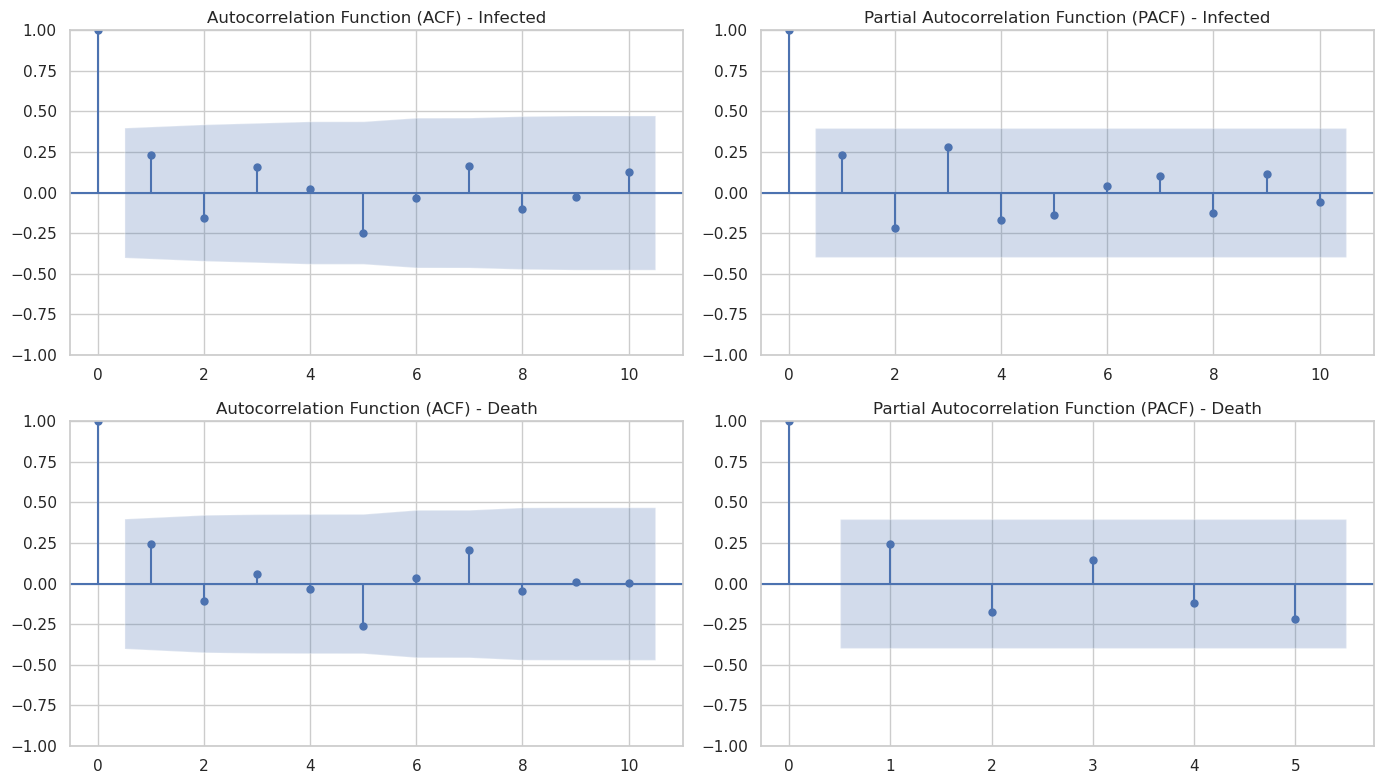


ACF values for 'Infected':
 [ 1.          0.22927    -0.15580224  0.15932038  0.02286057 -0.25082172
 -0.03197331  0.16538242 -0.1030448  -0.02620158  0.12382892]

PACF values for 'Infected':
 [ 1.          0.23923826 -0.24099432  0.32679474 -0.22264789 -0.1735788
  0.07087406  0.14885382 -0.22473652  0.22566145 -0.11651374]

ACF values for 'Death':
 [ 1.          0.24633666 -0.10551028  0.05700659 -0.03047973 -0.2624728
  0.03191782  0.20716988 -0.04337033  0.00983081  0.00428658]

PACF values for 'Death':
 [ 1.          0.25704695 -0.19399298  0.16727333 -0.14871308 -0.27691704
  0.25118421  0.14051698 -0.16684327  0.16505385 -0.28828532]
Suggested p, q values for 'Infected': p=1, q=1
Suggested p, q values for 'Death': p=1, q=1


In [63]:
from statsmodels.tsa.stattools import acf, pacf
# Assuming `data` is your DataFrame with 'Infected' and 'Death' columns

# Verify data structure
print("Data Head:\n", data.head())
print("\nChecking for NaN values:\n", data.isna().sum())

# Set up the subplots for ACF and PACF plots
plt.figure(figsize=(14, 8))

# ACF plot for Infected
plt.subplot(221)
plot_acf(data['Infected'].dropna(), lags=10, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Infected')

# PACF plot for Infected
plt.subplot(222)
plot_pacf(data['Infected'].dropna(), lags=10, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Infected')

# ACF plot for Death
plt.subplot(223)
plot_acf(data['Death'].dropna(), lags=10, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Death')

# PACF plot for Death
plt.subplot(224)
plot_pacf(data['Death'].dropna(), lags=5, ax=plt.gca())  # Reduced lags to 5
plt.title('Partial Autocorrelation Function (PACF) - Death')

# Display the plots
plt.tight_layout()
plt.show()

# Calculate ACF and PACF values
infected_acf = acf(data['Infected'].dropna(), nlags=10)
infected_pacf = pacf(data['Infected'].dropna(), nlags=10)
death_acf = acf(data['Death'].dropna(), nlags=10)
death_pacf = pacf(data['Death'].dropna(), nlags=10)

# Display the ACF and PACF values
print("\nACF values for 'Infected':\n", infected_acf)
print("\nPACF values for 'Infected':\n", infected_pacf)
print("\nACF values for 'Death':\n", death_acf)
print("\nPACF values for 'Death':\n", death_pacf)

# Suggesting p and q values
def suggest_p_q(pacf_values, acf_values):
    p = next((i for i, val in enumerate(pacf_values) if val < 1.96/np.sqrt(len(data['Infected']))), len(pacf_values))
    q = next((i for i, val in enumerate(acf_values) if val < 1.96/np.sqrt(len(data['Infected']))), len(acf_values))
    return p, q

p_infected, q_infected = suggest_p_q(infected_pacf, infected_acf)
p_death, q_death = suggest_p_q(death_pacf, death_acf)

print(f"Suggested p, q values for 'Infected': p={p_infected}, q={q_infected}")
print(f"Suggested p, q values for 'Death': p={p_death}, q={q_death}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


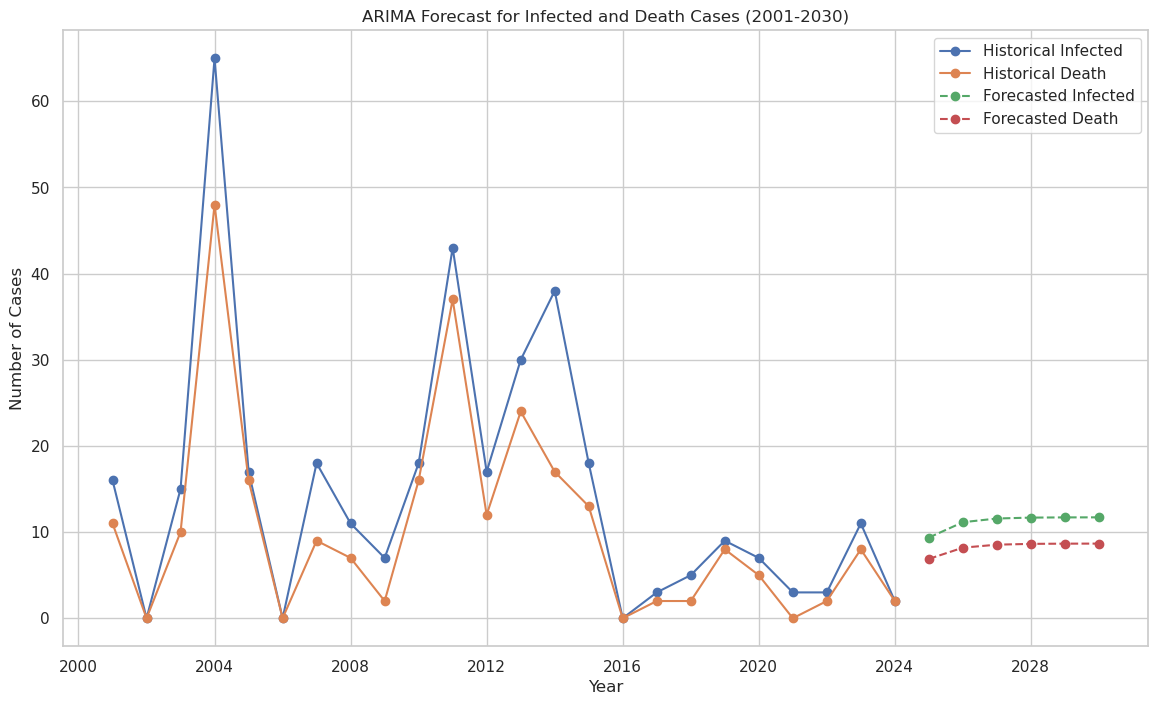

ARIMA Model Summary for Infected Cases:
                               SARIMAX Results                                
Dep. Variable:               Infected   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -96.581
Date:                Mon, 30 Sep 2024   AIC                            199.161
Time:                        08:41:04   BIC                            202.568
Sample:                    01-01-2001   HQIC                           200.018
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2417      0.296      0.818      0.413      -0.338       0.821
ma.L1         -0.9144      0.466     -1.962      0.050      -1.828      -0.001
sigma2      

In [64]:
# 1. ARIMA Model

# Define train and test sets
train = data[:'2024']
test = data['2025':]

arima_model = ARIMA(train["Death"], order=(1, 1, 1))
arima_fit = arima_model.fit()

predictions = arima_fit.forecast(6)

predictions
# Generate forecast for Infected cases
arima_model_infected = ARIMA(data["Infected"], order=(1, 1, 1))
arima_fit_infected = arima_model_infected.fit()
forecast_infected = arima_fit_infected.forecast(6)  # Forecasting for 2025-2030

# Generate forecast for Death cases
arima_model_death = ARIMA(data["Death"], order=(1, 1, 1))
arima_fit_death = arima_model_death.fit()
forecast_death = arima_fit_death.forecast(steps=6)  # Forecasting for 2025-2030

# Create a DataFrame for the forecasted values
forecast_years = pd.date_range(start='2025', periods=6, freq='YS')
forecast_df = pd.DataFrame({
    'Year': forecast_years,
    'Infected': forecast_infected,
    'Death': forecast_death
}).set_index('Year')

# Plot the forecasts
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['Infected'], label='Historical Infected', marker='o')
plt.plot(data.index, data['Death'], label='Historical Death', marker='o')
plt.plot(forecast_df.index, forecast_df['Infected'], label='Forecasted Infected', marker='o', linestyle='--')
plt.plot(forecast_df.index, forecast_df['Death'], label='Forecasted Death', marker='o', linestyle='--')
plt.title('ARIMA Forecast for Infected and Death Cases (2001-2030)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)

# Save the plot
output_path = os.path.join(output_dir, 'arima_forecast_infected_death.eps')
plt.savefig(output_path, dpi=220, format='eps')

output_path = os.path.join(output_dir, 'arima_forecast_infected_death.png')
plt.savefig(output_path, dpi=220, format='png')

# Display the plot
plt.show()

# Print summary of the ARIMA models
print("ARIMA Model Summary for Infected Cases:")
print(arima_fit_infected.summary())
print("\nARIMA Model Summary for Death Cases:")
print(arima_fit_death.summary())

# Print the forecasted values
print("\nForecasted Infected and Death Cases (2025-2030):")
print(forecast_df)

In [65]:
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Death   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -90.178
Date:                Mon, 30 Sep 2024   AIC                            186.357
Time:                        08:41:04   BIC                            189.763
Sample:                    01-01-2001   HQIC                           187.214
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2669      0.354      0.753      0.451      -0.428       0.961
ma.L1         -0.9282      0.572     -1.623      0.105      -2.049       0.193
sigma2       139.8327     76.158      1.836      0.066      -9.433     289.099
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                20.47
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                             1.76
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38810D+00    |proj g|=  2.07232D-01

At iterate    5    f=  2.16815D+00    |proj g|=  5.60309D-02

At iterate   10    f=  2.15802D+00    |proj g|=  5.02144D-03

At iterate   15    f=  2.15682D+00    |proj g|=  2.45757D-04

At iterate   20    f=  2.15647D+00    |proj g|=  2.91384D-03

At iterate   25    f=  2.15601D+00    |proj g|=  1.51747D-03

At iterate   30    f=  2.15579D+00    |proj g|=  5.91117D-04

At iterate   35    f=  2.15563D+00    |proj g|=  3.40455D-03


 This problem is unconstrained.



At iterate   40    f=  2.15536D+00    |proj g|=  2.06611D-03

At iterate   45    f=  2.15491D+00    |proj g|=  5.08628D-03

At iterate   50    f=  2.15473D+00    |proj g|=  1.57658D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     68      1     0     0   1.577D-04   2.155D+00
  F =   2.1547323520771786     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.08680D+00    |proj g|=  8.22070D-02

At iter

 This problem is unconstrained.



At iterate   40    f=  1.99646D+00    |proj g|=  1.44766D-03

At iterate   45    f=  1.99642D+00    |proj g|=  6.38406D-04

At iterate   50    f=  1.99641D+00    |proj g|=  1.10337D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     62      1     0     0   1.103D-04   1.996D+00
  F =   1.9964149480715907     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


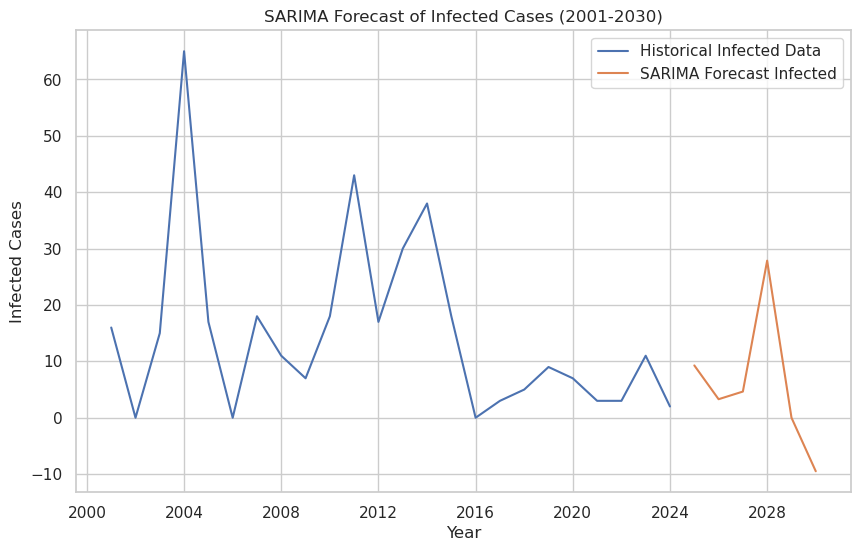

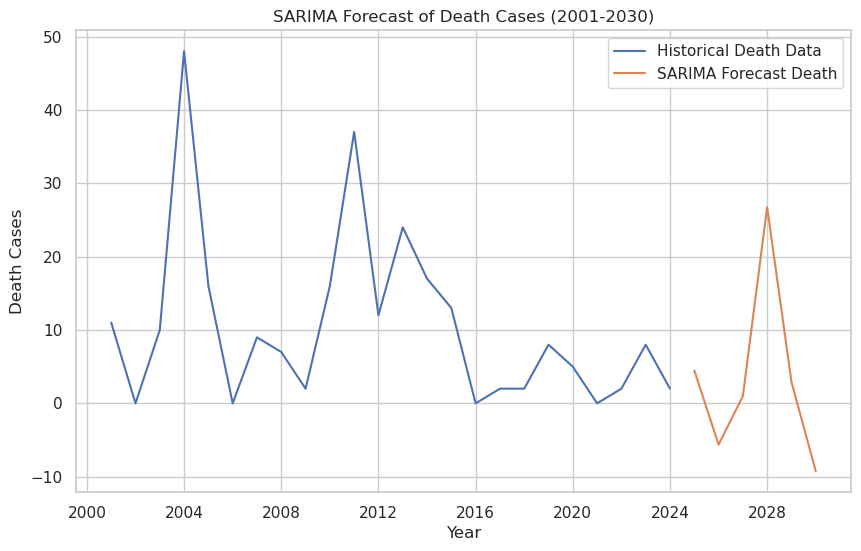

             Infected      Death
2025-01-01   9.279105   4.468028
2026-01-01   3.288033  -5.626379
2027-01-01   4.644569   0.994459
2028-01-01  27.858994  26.748802
2029-01-01   0.006563   2.905301
2030-01-01  -9.488566  -9.256804


In [66]:
# 2. SARIMA Model for Infected Cases
sarima_model_infected = SARIMAX(data["Infected"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit_infected = sarima_model_infected.fit()
sarima_forecast_infected = sarima_fit_infected.get_forecast(steps=6).predicted_mean

# 2. SARIMA Model for Death Cases
sarima_model_death = SARIMAX(data["Death"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit_death = sarima_model_death.fit()
sarima_forecast_death = sarima_fit_death.get_forecast(steps=6).predicted_mean

# Combine the forecasts into a DataFrame
forecast_index = pd.date_range(start='2025-01-01', periods=6, freq='YS')
forecast_df = pd.DataFrame({
    'Infected': sarima_forecast_infected,
    'Death': sarima_forecast_death
}, index=forecast_index)

# Plot SARIMA Forecast for Infected Cases
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Infected"], label="Historical Infected Data")
plt.plot(forecast_df.index, forecast_df["Infected"], label="SARIMA Forecast Infected")
plt.title("SARIMA Forecast of Infected Cases (2001-2030)")
plt.xlabel("Year")
plt.ylabel("Infected Cases")
plt.legend()
plt.grid(True)
plt.show()

# Plot SARIMA Forecast for Death Cases
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Death"], label="Historical Death Data")
plt.plot(forecast_df.index, forecast_df["Death"], label="SARIMA Forecast Death")
plt.title("SARIMA Forecast of Death Cases (2001-2030)")
plt.xlabel("Year")
plt.ylabel("Death Cases")
plt.legend()
plt.grid(True)
plt.show()

# Print the forecast summary
print(forecast_df)

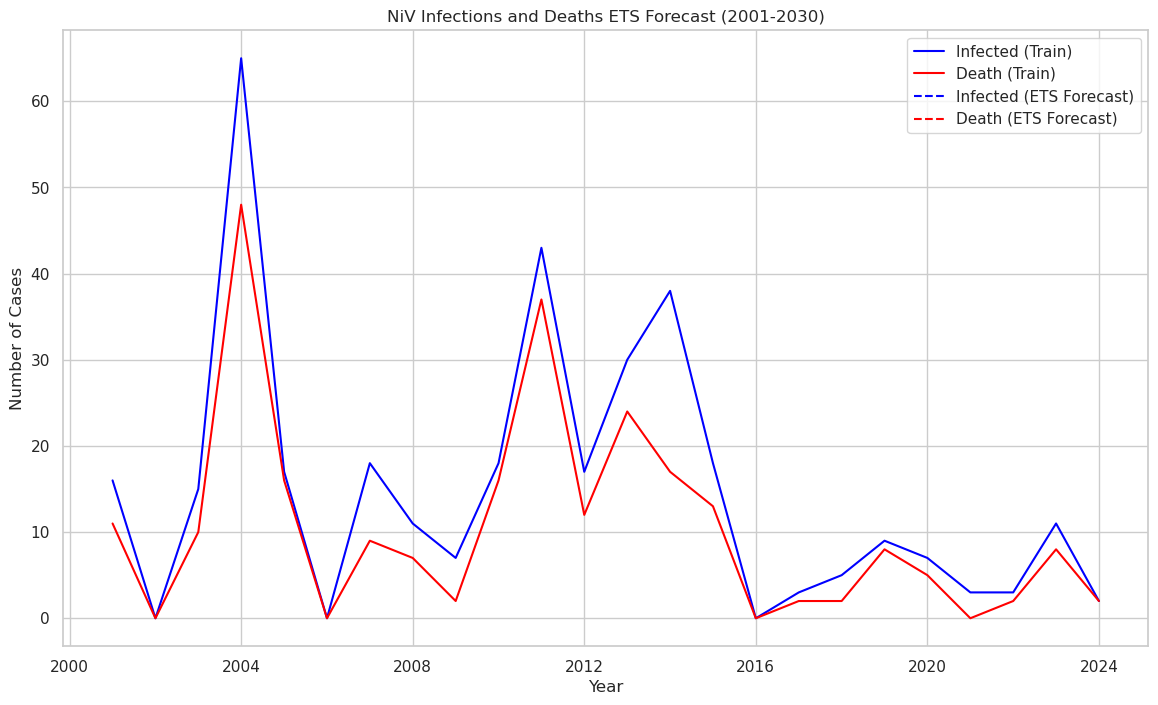

ETS Forecast for Infected Cases (2025-2030):
2025-12-31   NaN
2026-12-31   NaN
2027-12-31   NaN
2028-12-31   NaN
2029-12-31   NaN
2030-12-31   NaN
Freq: YE-DEC, dtype: float64

ETS Forecast for Death Cases (2025-2030):
2025-12-31   NaN
2026-12-31   NaN
2027-12-31   NaN
2028-12-31   NaN
2029-12-31   NaN
2030-12-31   NaN
Freq: YE-DEC, dtype: float64

ETS Model Summary for Infected Cases:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                 Infected   No. Observations:                   24
Model:             ExponentialSmoothing   SSE                           3440.834
Optimized:                         True   AIC                            151.170
Trend:                         Additive   BIC                            170.019
Seasonal:                      Additive   AICC                           287.970
Seasonal Periods:                    12   Date:                 Mon, 30 Sep 2024
Box-Cox:                          False   Ti

In [67]:
# Ensure 'nipah_data' DataFrame is properly indexed by 'Year'
# Ensure 'Year' column is present
if 'Year' not in nipah_data.columns:
    nipah_data['Year'] = list(range(2001, 2001 + len(nipah_data)))

nipah_data['Year'] = pd.to_datetime(nipah_data['Year'], format='%Y')
nipah_data.set_index('Year', inplace=True)

# Split the data into train and test sets
train = nipah_data[:'2024']
test = nipah_data['2025':]

# Forecasting Infected cases
ets_model_infected = ExponentialSmoothing(train['Infected'], trend="additive", seasonal="additive", seasonal_periods=12)
ets_fit_infected = ets_model_infected.fit()
ets_forecast_infected = ets_fit_infected.forecast(steps=6)

# Forecasting Death cases
ets_model_death = ExponentialSmoothing(train['Death'], trend="additive", seasonal="additive", seasonal_periods=12)
ets_fit_death = ets_model_death.fit()
ets_forecast_death = ets_fit_death.forecast(steps=6)

# Combine forecast index with existing data for plotting
forecast_index = pd.date_range(start=train.index[-1] + pd.DateOffset(years=1), periods=6, freq='Y')
ets_forecast_infected = pd.Series(ets_forecast_infected, index=forecast_index)
ets_forecast_death = pd.Series(ets_forecast_death, index=forecast_index)

# Plotting the results
plt.figure(figsize=(14, 8))
plt.title('NiV Infections and Deaths ETS Forecast (2001-2030)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

# Plot historical train data
plt.plot(train.index, train['Infected'], label='Infected (Train)', color='blue')
plt.plot(train.index, train['Death'], label='Death (Train)', color='red')

# Plot forecasted data
plt.plot(ets_forecast_infected.index, ets_forecast_infected, label='Infected (ETS Forecast)', color='blue', linestyle='--')
plt.plot(ets_forecast_death.index, ets_forecast_death, label='Death (ETS Forecast)', color='red', linestyle='--')

# Plot historical test data if available
if not test.empty:
    plt.axvline(x=test.index[-1], color='gray', linestyle='--')

plt.legend()
plt.grid(True)
plt.show()

# Display the forecasted values
print("ETS Forecast for Infected Cases (2025-2030):")
print(ets_forecast_infected)

print("\nETS Forecast for Death Cases (2025-2030):")
print(ets_forecast_death)

# Display the model summaries
print("\nETS Model Summary for Infected Cases:")
print(ets_fit_infected.summary())

print("\nETS Model Summary for Death Cases:")
print(ets_fit_death.summary())

08:41:06 - cmdstanpy - INFO - Chain [1] start processing
08:41:06 - cmdstanpy - INFO - Chain [1] done processing


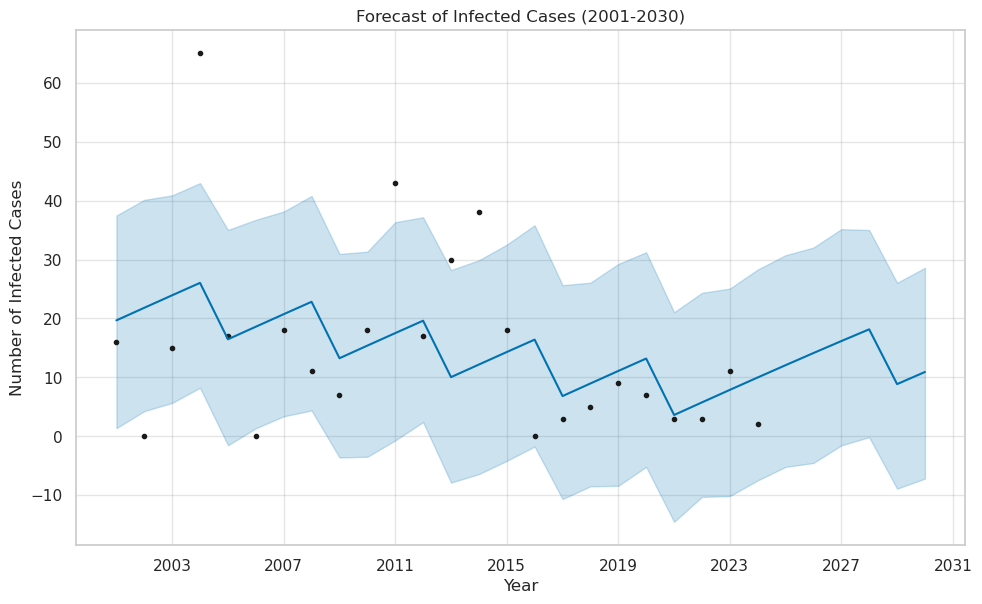

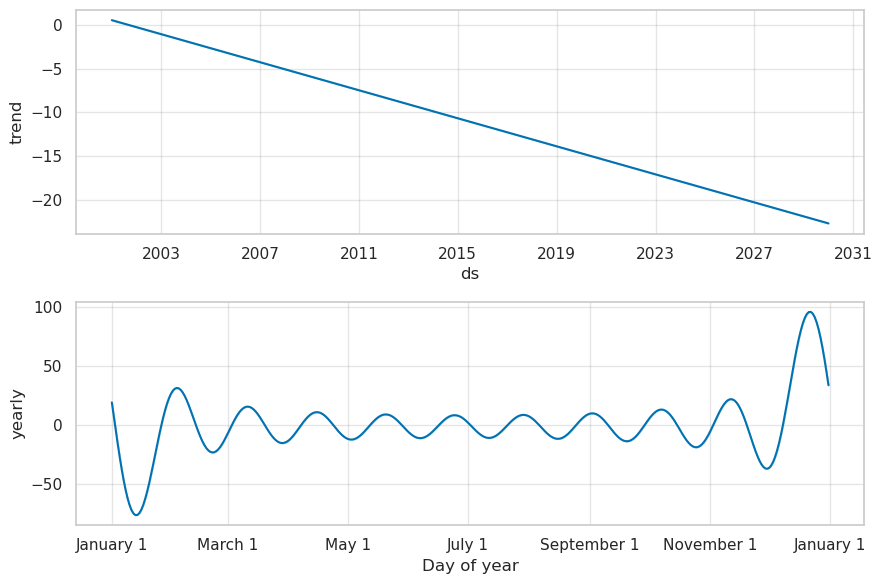

08:41:07 - cmdstanpy - INFO - Chain [1] start processing
08:41:07 - cmdstanpy - INFO - Chain [1] done processing


Summary of Prophet Forecast Model for Infected Cases:
count    30.000000
mean     14.534982
std       5.655771
min       3.600349
25%      10.245895
50%      14.203130
75%      18.481183
max      26.036625
Name: yhat, dtype: float64


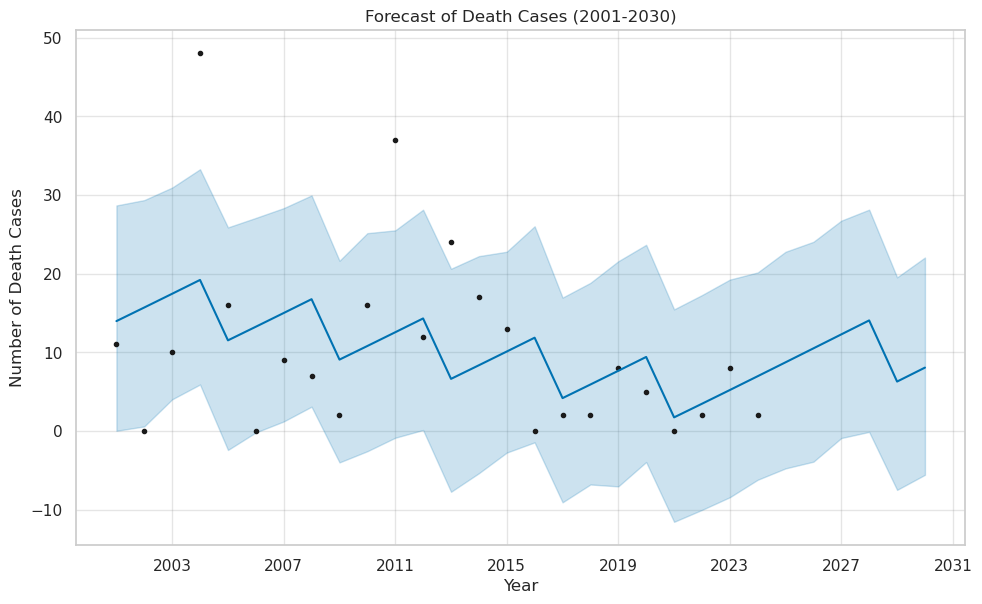

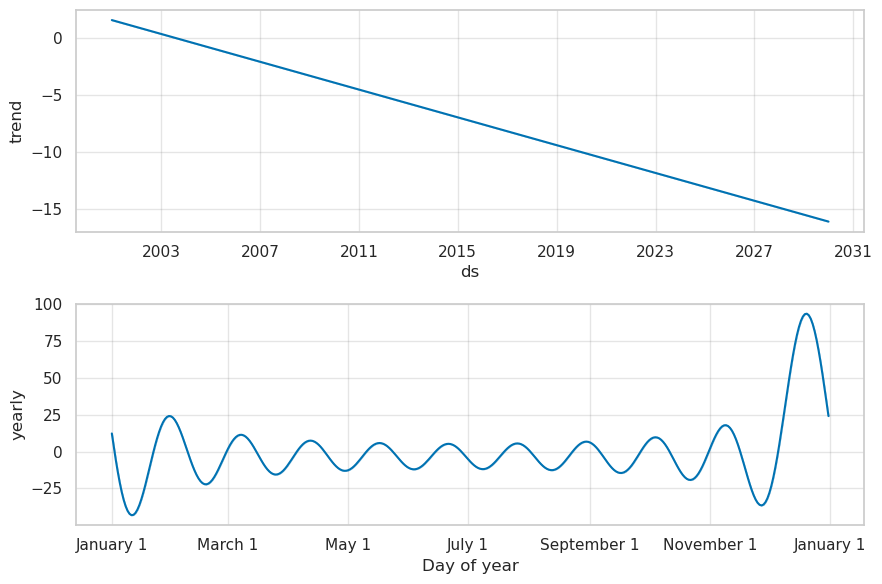

Summary of Prophet Forecast Model for Death Cases:
count    30.000000
mean     10.361971
std       4.366784
min       1.727235
25%       7.133094
50%      10.299691
75%      13.787779
max      19.200453
Name: yhat, dtype: float64


In [68]:
# 5. Prophet Model for Infected Cases
prophet_train_infected = train.reset_index().rename(columns={"Year": "ds", "Infected": "y"})
prophet_model_infected = Prophet(
    yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False
)
prophet_model_infected.fit(prophet_train_infected)

# Forecast until 2030 for Infected Cases
future_infected = prophet_model_infected.make_future_dataframe(periods=6, freq="Y")
prophet_forecast_infected = prophet_model_infected.predict(future_infected)

# Plot the forecast for Infected Cases
fig_infected = prophet_model_infected.plot(prophet_forecast_infected)
plt.title('Forecast of Infected Cases (2001-2030)')
plt.xlabel('Year')
plt.ylabel('Number of Infected Cases')
plt.grid(True)
plt.show()

# Plot forecast components separately (trend, yearly seasonality) for Infected Cases
fig_components_infected = prophet_model_infected.plot_components(prophet_forecast_infected)
plt.show()

# Generate a summary of the forecast model for Infected Cases
prophet_forecast_infected_summary = prophet_forecast_infected['yhat'].describe()
print("Summary of Prophet Forecast Model for Infected Cases:")
print(prophet_forecast_infected_summary)

# 5. Prophet Model for Death Cases
prophet_train_death = train.reset_index().rename(columns={"Year": "ds", "Death": "y"})
prophet_model_death = Prophet(
    yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False
)
prophet_model_death.fit(prophet_train_death)

# Forecast until 2030 for Death Cases
future_death = prophet_model_death.make_future_dataframe(periods=6, freq="Y")
prophet_forecast_death = prophet_model_death.predict(future_death)

# Plot the forecast for Death Cases
fig_death = prophet_model_death.plot(prophet_forecast_death)
plt.title('Forecast of Death Cases (2001-2030)')
plt.xlabel('Year')
plt.ylabel('Number of Death Cases')
plt.grid(True)
plt.show()

# Plot forecast components separately (trend, yearly seasonality) for Death Cases
fig_components_death = prophet_model_death.plot_components(prophet_forecast_death)
plt.show()

# Generate a summary of the forecast model for Death Cases
prophet_forecast_death_summary = prophet_forecast_death['yhat'].describe()
print("Summary of Prophet Forecast Model for Death Cases:")
print(prophet_forecast_death_summary)

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define the calculate_error_metrics function
def calculate_error_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100
    return mae, rmse, mape

# Ensure 'Year' column is present
if 'Year' not in nipah_data.columns:
    nipah_data['Year'] = list(range(2001, 2001 + len(nipah_data)))

nipah_data['Year'] = pd.to_datetime(nipah_data['Year'], format='%Y')
nipah_data.set_index('Year', inplace=True)
test = nipah_data['2025':]  # Assuming 'nipah_data' is the DataFrame with 'Year' and 'Infected' columns

# Generate ARIMA forecast if test is not empty
if not test.empty:
    arima_forecast = arima_fit.predict(start=test.index[0], end=test.index[-1])
    arima_forecast = arima_forecast[:len(test)]

sarima_forecast_infected = sarima_forecast_infected[:len(test)]
prophet_forecast_test = prophet_forecast_infected['yhat'][:len(test)]
ets_forecast_infected = ets_forecast_infected[:len(test)]
prophet_forecast_test = prophet_forecast_test[:len(test)]

# Initialize a dictionary to store the error metrics
error_metrics = {
    'Model': [],
    'MAE': [],
    'RMSE': [],
    'MAPE': []
}

# Calculate error metrics for Prophet model
if len(test) > 0 and len(prophet_forecast_test) > 0:
    mae, rmse, mape = calculate_error_metrics(test['Infected'], prophet_forecast_test)
    error_metrics['Model'].append('Prophet')
    error_metrics['MAE'].append(mae)
    error_metrics['RMSE'].append(rmse)
    error_metrics['MAPE'].append(mape)

# Calculate error metrics for ARIMA model
if not test.empty:
    arima_forecast = arima_fit.predict(start=test.index[0], end=test.index[-1])
    mae, rmse, mape = calculate_error_metrics(test['Infected'], arima_forecast)
    error_metrics['Model'].append('ARIMA')
    error_metrics['MAE'].append(mae)
    error_metrics['RMSE'].append(rmse)
    error_metrics['MAPE'].append(mape)

    # Calculate error metrics for SARIMA model
    sarima_forecast_infected = sarima_fit_infected.get_forecast(start=test.index[0], end=test.index[-1]).predicted_mean
    mae, rmse, mape = calculate_error_metrics(test['Infected'], sarima_forecast_infected)
    error_metrics['Model'].append('SARIMA')
    error_metrics['MAE'].append(mae)
    error_metrics['RMSE'].append(rmse)
    error_metrics['MAPE'].append(mape)

# Calculate error metrics for ETS model
if not test.empty:
    ets_forecast_infected = ets_fit_infected.predict(start=test.index[0], end=test.index[-1])
    mae, rmse, mape = calculate_error_metrics(test['Infected'], ets_forecast_infected)
    error_metrics['Model'].append('ETS')
    error_metrics['MAE'].append(mae)
    error_metrics['RMSE'].append(rmse)
    error_metrics['MAPE'].append(mape)

# Create a DataFrame to display the error metrics
error_metrics_df = pd.DataFrame(error_metrics)
print(error_metrics_df)


Empty DataFrame
Columns: [Model, MAE, RMSE, MAPE]
Index: []
